In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root {--jp-notebook-max-width: 3000px;}</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
display(HTML('<style>.container {width:100% !important} </style>'))

# 기계학습 (60점)

### 2023년도 NBA 농구 슛 시도 관련 데이터
data_path = './data/nba.csv'

NBA 각 경기에서 발생한 슛 시도 관련 데이터이다.     
자유튜(1점)은 없고 각 경기의 승패는 2,3점의 총 합으로 결정된다고 가정한다.

TEAM_NAME : 팀명     
PLAYER_ID : 슛을 쏜 선수    
POSITION_GROUP : 포지션    
GAME_ID : 게임명     
SHOT_MADE : 슛 성공여부 (True : 성공 ,False : 실패)     
ACTION_TYPE : 슛 종류     
SHOT_TYPE : 점수 (2점,3점)    
ZONE_ABB : 점수 존     
LOC_X : 슛을 쏜 x 좌표     
LOC_Y : 슛을 쏜 y 좌표      
QUARTER : 쿼터 (정규경기 4쿼터까지 쿼터당 12분)    
MINS_LEFT : 쿼터의 잔여 시간 (분)    
SECS_LEFT : 쿼터의 잔여 시간 (초)     

In [3]:
import pandas as pd
df =pd.read_csv('./data/nba.csv')
df.head()

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT
0,team_5,player_1,G,22300003,False,Driving Floating Jump Shot,2PT Field Goal,C,-0.4,17.45,1,11,1
1,team_5,player_2,F,22300003,True,Jump Shot,3PT Field Goal,C,1.5,30.55,1,10,26
2,team_5,player_3,G,22300003,True,Driving Layup Shot,2PT Field Goal,C,-3.3,6.55,1,9,46
3,team_5,player_1,G,22300003,True,Running Finger Roll Layup Shot,2PT Field Goal,C,-1.0,5.85,1,8,30
4,team_5,player_3,G,22300003,True,Cutting Layup Shot,2PT Field Goal,C,-0.0,6.25,1,8,8


### 기계학습1
아래의 기준으로 파생변수 3개를 만들어라 
- shot_distance (슛거리)     : LOC_X, LOX_Y 좌표의 제곱합에 루트를 씌운다
- net_play_time (경기경과시간) : 슛을 시도한 시점의 순 경기 시간을 초(sec)단위로 구한다. 쉬는시간은 고려하지 않는다. 4쿼터 종료시점(MINS_LEFT =0, SECS_LEFT=0)에 슛을 시도했다면 2880 값을 가져야 한다. 
- net_score : 해당 게임에 해당팀이 슛을 쏜 결과를 반영한 누적 득점

![imgs](./data/img/p1.png)

In [4]:
data = df.copy()

In [5]:
data['shot_distnace'] = np.sqrt(data['LOC_X']**2 + data['LOC_Y']**2)
data.head(5)

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace
0,team_5,player_1,G,22300003,False,Driving Floating Jump Shot,2PT Field Goal,C,-0.4,17.45,1,11,1,17.454584
1,team_5,player_2,F,22300003,True,Jump Shot,3PT Field Goal,C,1.5,30.55,1,10,26,30.586803
2,team_5,player_3,G,22300003,True,Driving Layup Shot,2PT Field Goal,C,-3.3,6.55,1,9,46,7.334337
3,team_5,player_1,G,22300003,True,Running Finger Roll Layup Shot,2PT Field Goal,C,-1.0,5.85,1,8,30,5.934855
4,team_5,player_3,G,22300003,True,Cutting Layup Shot,2PT Field Goal,C,-0.0,6.25,1,8,8,6.250000


In [6]:
data['net_play_time'] = 12*60*(data['QUARTER'] - 1) + 12*60 - 60*data['MINS_LEFT'] - data['SECS_LEFT']
data.head(5)

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace,net_play_time
0,team_5,player_1,G,22300003,False,Driving Floating Jump Shot,2PT Field Goal,C,-0.4,17.45,1,11,1,17.454584,59
1,team_5,player_2,F,22300003,True,Jump Shot,3PT Field Goal,C,1.5,30.55,1,10,26,30.586803,94
2,team_5,player_3,G,22300003,True,Driving Layup Shot,2PT Field Goal,C,-3.3,6.55,1,9,46,7.334337,134
3,team_5,player_1,G,22300003,True,Running Finger Roll Layup Shot,2PT Field Goal,C,-1.0,5.85,1,8,30,5.934855,210
4,team_5,player_3,G,22300003,True,Cutting Layup Shot,2PT Field Goal,C,-0.0,6.25,1,8,8,6.250000,232


In [7]:
data['score'] = data.apply(lambda x : int(x['SHOT_TYPE'][0]) if x['SHOT_MADE'] == True else 0, axis = 1)
data.head(5)

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace,net_play_time,score
0,team_5,player_1,G,22300003,False,Driving Floating Jump Shot,2PT Field Goal,C,-0.4,17.45,1,11,1,17.454584,59,0
1,team_5,player_2,F,22300003,True,Jump Shot,3PT Field Goal,C,1.5,30.55,1,10,26,30.586803,94,3
2,team_5,player_3,G,22300003,True,Driving Layup Shot,2PT Field Goal,C,-3.3,6.55,1,9,46,7.334337,134,2
3,team_5,player_1,G,22300003,True,Running Finger Roll Layup Shot,2PT Field Goal,C,-1.0,5.85,1,8,30,5.934855,210,2
4,team_5,player_3,G,22300003,True,Cutting Layup Shot,2PT Field Goal,C,-0.0,6.25,1,8,8,6.250000,232,2


In [8]:
data['net_score'] = data.groupby(['TEAM_NAME','GAME_ID']).agg(np.cumsum)['score']
data.head(5)

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace,net_play_time,score,net_score
0,team_5,player_1,G,22300003,False,Driving Floating Jump Shot,2PT Field Goal,C,-0.4,17.45,1,11,1,17.454584,59,0,0
1,team_5,player_2,F,22300003,True,Jump Shot,3PT Field Goal,C,1.5,30.55,1,10,26,30.586803,94,3,3
2,team_5,player_3,G,22300003,True,Driving Layup Shot,2PT Field Goal,C,-3.3,6.55,1,9,46,7.334337,134,2,5
3,team_5,player_1,G,22300003,True,Running Finger Roll Layup Shot,2PT Field Goal,C,-1.0,5.85,1,8,30,5.934855,210,2,7
4,team_5,player_3,G,22300003,True,Cutting Layup Shot,2PT Field Goal,C,-0.0,6.25,1,8,8,6.250000,232,2,9


### 기계학습2
데이터 EDA를 실시하라 (시각화 포함)

In [9]:
data.isnull().sum().to_frame().T

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace,net_play_time,score,net_score
0,0,0,1195,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data.nunique().to_frame().T

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace,net_play_time,score,net_score
0,30,568,3,1171,2,48,2,6,492,668,4,12,60,32499,2866,3,143


In [11]:
data.dtypes.to_frame().T

,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distnace,net_play_time,score,net_score
0,object,object,object,int64,bool,object,object,object,float64,float64,int64,int64,int64,float64,int64,int64,int64


### 기계학습3     
3쿼터까지의 데이터를 바탕으로 승부를 예측하는 분류 모델을 만들려고 한다.
데이터를 아래 기준으로 전처리 진행한다.

- 각 행은 하나의 팀, 하나의 게임 아이디에 대한 정보를 나타낸다.
- 각 쿼터(1~3쿼터)를 6분간격으로 두 구간으로 나누어 새로운 파생변수를 만든다.      
    - 1_1_try (1쿼터의 0~6분)의 2점 실패 횟수)(1_1_try_2) , 3점 실패 횟수 (1_1_try_3)
    - 1_2_try (1쿼터의 6~12분)의 2점 실패 횟수 (1_1_try_2) ,3점 실패 횟수 (1_1_try_3)
    - ~ 3쿼터까지 총 6구간에 대해 12개의 컬럼
- 해당 게임의 팀별 1쿼터까지 득점, 3쿼터까지의 총 득점(2,3점) (총 2개컬럼, 1_q_score , 3_q_score)
- 4쿼터 후 최종 승패여부(result) (승 : 1 , 패 :0 ) - 자유투는 없다고 가정, 2,3점 만으로 게임의 승부를 결정, 승부가 결정나지 않은 게임은 없다

![img](./data/img/p2.png)

In [12]:
data2 = data.copy()

In [13]:
data2['QUARTER2'] = data2['MINS_LEFT'].apply(lambda x : '2' if x < 6 else '1')
data2['QUARTER3'] = data2['QUARTER'].astype('str') + '_' + data2['QUARTER2']
data2_gp = data2.groupby(['GAME_ID', 'TEAM_NAME', 'QUARTER3', 'SHOT_TYPE', 'SHOT_MADE'])[['PLAYER_ID']].count().reset_index()
data2_2pt = data2_gp[(data2_gp['SHOT_MADE'] == False) & (data2_gp['SHOT_TYPE'].str[0] == '2') & (data2_gp['QUARTER3'].str[0] != '4')].pivot_table(index = ['GAME_ID', 'TEAM_NAME'], columns = 'QUARTER3', values = 'PLAYER_ID').reset_index().fillna(0).rename_axis(None, axis = 1)
data2_2pt.columns = data2_2pt.columns[:2].to_list() + [i + '_try_2' for i in data2_2pt.columns[2:]]
data2_3pt = data2_gp[(data2_gp['SHOT_MADE'] == False) & (data2_gp['SHOT_TYPE'].str[0] == '3') & (data2_gp['QUARTER3'].str[0] != '4')].pivot_table(index = ['GAME_ID', 'TEAM_NAME'], columns = 'QUARTER3', values = 'PLAYER_ID').reset_index().fillna(0).rename_axis(None, axis = 1)
data2_3pt.columns = data2_3pt.columns[:2].to_list() + [i + '_try_3' for i in data2_3pt.columns[2:]]

In [14]:
data2_score = data2.groupby(['GAME_ID', 'TEAM_NAME', 'QUARTER']).sum().reset_index().pivot_table(index = ['GAME_ID', 'TEAM_NAME'], columns = 'QUARTER', values = 'score').reset_index().rename_axis(None,axis = 1)
data2_score['1_q_score'] = data2_score[1]
data2_score['3_q_score'] = data2_score[1] + data2_score[2] + data2_score[3]
data2_score = data2_score.drop(columns = [1,2,3,4])
data2_score

,GAME_ID,TEAM_NAME,1_q_score,3_q_score
0,22300001,team_1,33,79
1,22300001,team_2,24,76
2,22300002,team_3,24,62
3,22300002,team_4,20,74
4,22300003,team_5,33,78
...,...,...,...,...
2337,22301228,team_27,22,76
2338,22301229,team_1,25,80
2339,22301229,team_4,25,78
2340,22301230,team_19,28,63


In [15]:
data2_result = data2.groupby(['GAME_ID', 'TEAM_NAME']).sum().reset_index()[['GAME_ID', 'TEAM_NAME', 'score']]#.sort_values(['GAME_ID', 'score'], ascending = [True, False])
data2_result2 = data2_result.sort_values(['GAME_ID', 'TEAM_NAME'], ascending = [True, False]).reset_index()
data2_result['TEAM_NAME_OP'] = data2_result2['TEAM_NAME']
data2_result['score_op'] = data2_result2['score']
data2_result['result'] = data2_result.apply(lambda x : 1 if x['score'] > x['score_op'] else 0, axis = 1)
data2_result

,GAME_ID,TEAM_NAME,score,TEAM_NAME_OP,score_op,result
0,22300001,team_1,105,team_2,96,1
1,22300001,team_2,96,team_1,105,0
2,22300002,team_3,86,team_4,90,0
3,22300002,team_4,90,team_3,86,1
4,22300003,team_5,105,team_6,109,0
...,...,...,...,...,...,...
2337,22301228,team_27,98,team_25,91,1
2338,22301229,team_1,107,team_4,98,1
2339,22301229,team_4,98,team_1,107,0
2340,22301230,team_19,75,team_26,111,0


In [16]:
result = pd.merge(data2_result[['GAME_ID', 'TEAM_NAME', 'result']], data2_2pt, on = ['GAME_ID', 'TEAM_NAME'], how = 'outer')
result = pd.merge(result, data2_3pt, on = ['GAME_ID', 'TEAM_NAME'], how = 'outer')
result = pd.merge(result, data2_score, on = ['GAME_ID', 'TEAM_NAME'], how = 'outer')
result

,GAME_ID,TEAM_NAME,result,1_1_try_2,1_2_try_2,2_1_try_2,2_2_try_2,3_1_try_2,3_2_try_2,1_1_try_3,1_2_try_3,2_1_try_3,2_2_try_3,3_1_try_3,3_2_try_3,1_q_score,3_q_score
0,22300001,team_1,1,5.0,3.0,3.0,2.0,4.0,4.0,2.0,1.0,1.0,3.0,3.0,3.0,33,79
1,22300001,team_2,0,5.0,2.0,3.0,1.0,3.0,1.0,2.0,3.0,2.0,5.0,1.0,1.0,24,76
2,22300002,team_3,0,7.0,7.0,0.0,7.0,0.0,0.0,3.0,3.0,5.0,3.0,6.0,5.0,24,62
3,22300002,team_4,1,1.0,6.0,4.0,4.0,3.0,4.0,1.0,4.0,3.0,0.0,3.0,3.0,20,74
4,22300003,team_5,0,1.0,1.0,6.0,2.0,3.0,1.0,0.0,2.0,1.0,4.0,3.0,1.0,33,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,22301228,team_27,1,3.0,1.0,4.0,6.0,4.0,2.0,7.0,3.0,4.0,3.0,1.0,1.0,22,76
2338,22301229,team_1,1,2.0,6.0,5.0,0.0,2.0,1.0,2.0,3.0,1.0,6.0,6.0,3.0,25,80
2339,22301229,team_4,0,4.0,6.0,6.0,2.0,0.0,7.0,1.0,3.0,1.0,3.0,3.0,1.0,25,78
2340,22301230,team_19,0,5.0,5.0,6.0,0.0,5.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,28,63



### 기계학습4     
game_id가 홀수로 끝나는 경우는 승리팀만, 짝수를 끝나는 경우는 패배팀만 필터한다.     
랜덤포레스트와 xgb를 사용하여 모델링을 진행하라. 데이터의 층화 추출을 통해 70%의 데이터로 학습하고 30% 데이터로 검증하라

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [18]:
data3 = result[((result['GAME_ID']%2 == 1) & (result['result'] == 1)) | ((result['GAME_ID']%2 == 0) & (result['result'] == 0))]
data3 = data3.drop(['GAME_ID', 'TEAM_NAME'], axis = 1).reset_index(drop = True)

In [19]:
x = data3.drop(['result'], axis = 1)
y = data3['result']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 3)

rf 정확도:0.65
ada 정확도:0.58


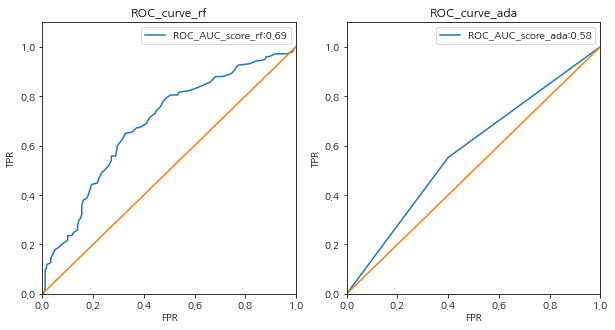

In [40]:
rf = RandomForestClassifier(random_state = 3)
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state = 3, learning_rate = 0.7)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict_proba(x_test)
y_pred_rf2 = rf.predict(x_test)
ada.fit(x_train, y_train)
y_pred_ada = ada.predict_proba(x_test)
y_pred_ada2 = ada.predict(x_test)

print(f'rf 정확도:{round(accuracy_score(y_test, y_pred_rf2),2)}')
print(f'ada 정확도:{round(accuracy_score(y_test, y_pred_ada2),2)}')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf[:,1])
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada[:,1])

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(fpr_rf, tpr_rf, '-', label = f'ROC_AUC_score_rf:{round(roc_auc_score(y_test, y_pred_rf[:,1]),2)}')
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.xlabel('FPR')
plt.ylim([0,1.1])
plt.ylabel('TPR')
plt.title('ROC_curve_rf')
plt.legend()
plt.subplot(122)
plt.plot(fpr_ada, tpr_ada, '-', label = f'ROC_AUC_score_ada:{round(roc_auc_score(y_test, y_pred_ada[:,1]),2)}')
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.xlabel('FPR')
plt.ylim([0,1.1])
plt.ylabel('TPR')
plt.title('ROC_curve_ada')
plt.legend()
plt.show()

### 캘리포니아 집값 데이터


MedInc (Median Income): 지역의 중간 소득. 가구의 중간 연간 소득을 나타냅니다.    
HouseAge (House Age): 지역의 평균 주택 연령. 주택이 지어진 지 얼마나 되었는지를 나타냅니다.     
AveRooms (Average Rooms): 지역의 평균 방 개수. 지역 내 집들의 평균 방 개수를 나타냅니다.     
AveBedrms (Average Bedrooms): 지역의 평균 침실 개수. 지역 내 집들의 평균 침실 개수를 나타냅니다.     
Population: 지역의 총 인구 수. 특정 지역 내 인구 수를 나타냅니다.     
AveOccup (Average Occupancy): 지역의 평균 거주 인원 수. 집당 평균 거주 인원 수를 나타냅니다.    
Latitude: 지역의 위도. 지구의 북쪽 또는 남쪽 위치를 나타내는 좌표입니다.       
Longitude: 지역의 경도. 지구의 동쪽 또는 서쪽 위치를 나타내는 좌표입니다.      
MedHouseVal (종속변수) : 집값 (천 달러 단위)

In [ ]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
X,y=pd.DataFrame(cali.data,columns =cali['feature_names']), pd.DataFrame(cali.target,columns =['MedHouseVal'])
display(X.head())
display(y.head())

In [26]:
import xlwings as xl

In [28]:
book1 = xl.Book('C:\\Users\\KB099\\CODE모음\\ADP\\set2_v4\\data\\cal_housing.csv')
data1 = book1.sheets(1).used_range.options(pd.DataFrame).value
book1.close()
data1.head(5)

,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,,,,,,,,
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [34]:
cali = data1.reset_index()
x,y= cali.drop('medianHouseValue', axis =1), cali[['medianHouseValue']]
display(x.head())
display(y.head())

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


,medianHouseValue
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


### 기계학습5
데이터 EDA 및 시각화

In [43]:
null = x.isnull().sum().to_frame().T
null = null.rename(index = {0:'null'})
dtype = x.dtypes.to_frame().T
dtype = dtype.rename(index = {0:'dtype'})

info_df = pd.concat((x.describe(), null, dtype))
info_df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
count,20640,20640,20640,20640,20640,20640,20640,20640
mean,-119.57,35.6319,28.6395,2635.76,537.898,1425.48,499.54,3.87067
std,2.00353,2.13595,12.5856,2181.62,421.248,1132.46,382.33,1.89982
min,-124.35,32.54,1,2,1,3,1,0.4999
25%,-121.8,33.93,18,1447.75,295,787,280,2.5634
50%,-118.49,34.26,29,2127,435,1166,409,3.5348
75%,-118.01,37.71,37,3148,647,1725,605,4.74325
max,-114.31,41.95,52,39320,6445,35682,6082,15.0001
null,0,0,0,0,0,0,0,0
dtype,float64,float64,float64,float64,float64,float64,float64,float64


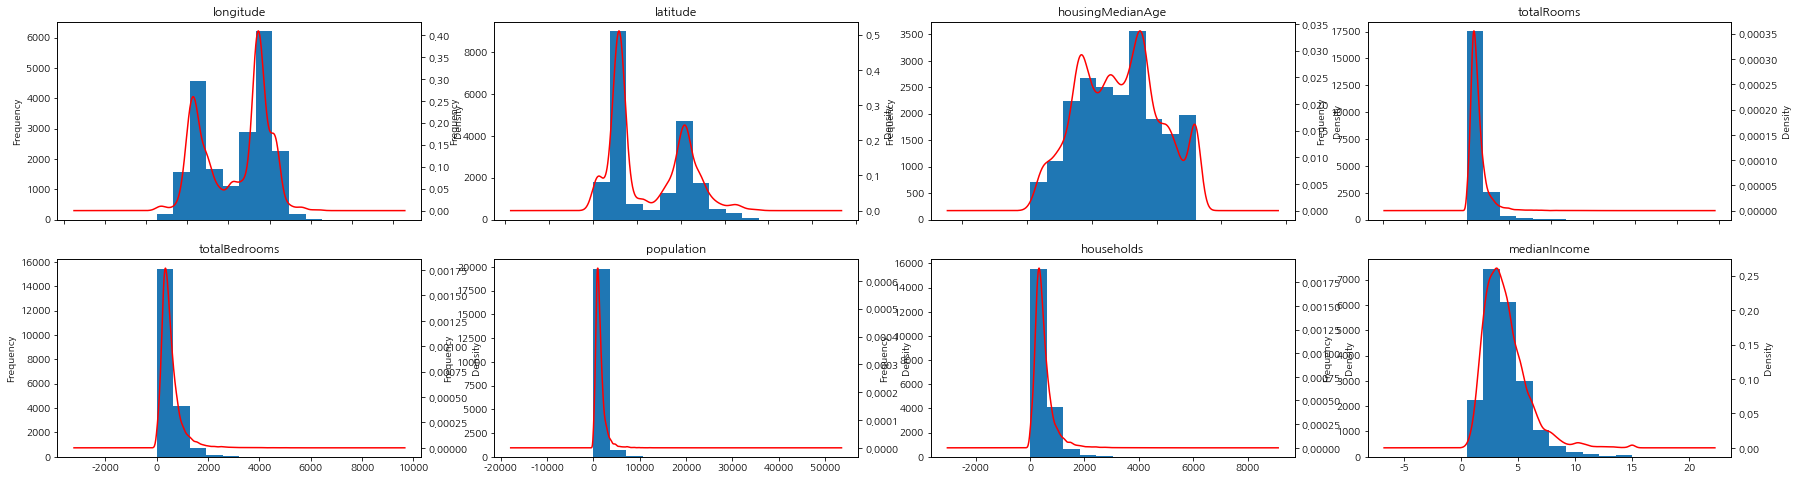

In [78]:
fig, axes = plt.subplots(2,4, figsize = (30,8))

for i, ax in enumerate(axes.flat[:]):
    col = x.columns[i]
    x[col].plot(kind = 'hist',ax = ax, label = 'histogram')
    ax2 = ax.twinx()
    x[col].plot(kind = 'kde', ax = ax2, c ='red', label = 'kde')
    plt.title(col)
    
plt.show()

### 기계학습6
변수들의 다중공선성을 검토하라

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [83]:
x.corr()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000


In [86]:
vif = [VIF(x.values, i) for i in range(x.shape[1])]
vif_df = pd.DataFrame(vif, columns = ['VIF'])
vif_df['col'] = x.columns
vif_df

,VIF,col
0,616.205226,longitude
1,549.732353,latitude
2,7.293454,housingMedianAge
3,30.330820,totalRooms
4,94.239447,totalBedrooms
5,16.457550,population
6,91.737819,households
7,8.246995,medianIncome


In [110]:
x_drop = x.drop(['longitude', 'totalBedrooms', 'households'] , axis = 1)
vif2 = [VIF(x_drop.values, i) for i in range(x_drop.shape[1])]
vif_df2 = pd.DataFrame(vif2, columns = ['VIF'])
vif_df2['col'] = x_drop.columns
vif_df2

,VIF,col
0,14.552611,latitude
1,6.917551,housingMedianAge
2,11.207539,totalRooms
3,10.648758,population
4,5.731988,medianIncome


### 기계학습7     
회귀모델을 제작할 때 다중공선성을 줄이기 위한 방법 3가지를 서술하라

In [ ]:
#1. vif가 높은 변수 제거
#2. PCA
#3. Ridge

### 기계학습8     
훈련용 데이터와 평가용 데이터를 7:3으로 분리한 후, 다중선형회귀모델과 엘라스틱넷모델을 통해 회귀 모델링을 진행하고 rmse값을 기준으로 평가하라. 엘라스틱넷 모델의 경우, 정규화 강도 파라미터를 2가지, l1,l2 페널티를 3가지 방식으로 조정한 모델 총 6개를 만들고 결과에 대해 분석하라

In [90]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 19)

In [115]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_lr))

69755.89117876734

In [116]:
alpha = [0.5, 1]
l1 = [0.3, 0.5, 0.7]

for a in alpha:
    for l in l1:
        en = ElasticNet(alpha = a, l1_ratio = l)
        en.fit(x_train, y_train)
        y_pred_en = en.predict(x_test)
        print(f'alpha={a}, l1-ratio={l}:{np.sqrt(mean_squared_error(y_test, y_pred_en))}')

alpha=0.5, l1-ratio=0.3:72387.31106479818
alpha=0.5, l1-ratio=0.5:71553.89806333612
alpha=0.5, l1-ratio=0.7:70687.73130484646
alpha=1, l1-ratio=0.3:74987.47403540685
alpha=1, l1-ratio=0.5:73555.05666707366
alpha=1, l1-ratio=0.7:71976.43543727657


# 통계 (40점)

### 통계1      
한 제조회사에서는 제품의 품질을 보장하기 위해 생산 라인에서 무작위로 10개의 제품을 샘플링하여 품질 검사를 실시한다. 이때, 제품이 불량일 확률은 23%다.

(1) 적어도 3개의 제품이 불량일 확률은?
(2) 2개 이하의 제품이 불량일 확률은?

In [117]:
from scipy.stats import binom

In [118]:
bi = binom(10,0.23)
print(f'(1){1-bi.cdf(2)}')
print(f'(2){bi.cdf(2)}')

(1)0.4137172738381184
(2)0.5862827261618816


### 통계2
어느 고객 서비스 센터에는 센터에는 평균적으로 1분에 3건의 전화가 걸려온다. 전화 빈도는 아래와 같은 조건을 가진다.
전화가 걸려오는 사건이 독립적이다.
특정 시간 동안에 전화가 걸려올 확률이 일정하다.
단위 시간 내에 동시에 두 개 이상의 전화가 걸려올 확률은 매우 낮다.

(1) 10분 동안 전화가 23통 이하로 걸려올 확률은?
(2) 10분 동안 전화가 정확히 30통 걸려올 확률은?

In [119]:
from scipy.stats import poisson

In [122]:
poi = poisson(30)

print(f'(1){poi.cdf(23)}')
print(f'(2){poi.pmf(30)}')

(1)0.11464591271427384
(2)0.07263452647159181


### 통계 3    
한 회사에서 직원들의 근무 만족도가 개선되었는지를 평가하기 위해, 직원들에게 개선 전과 개선 후의 만족도를 각각 설문조사했다. 만족도 점수는 1에서 10까지의 범위로 측정된다. 다음은 10명의 직원이 제공한 만족도 점수다

개선 전: [5, 6, 7, 5, 6, 8, 7, 5, 6, 9]      
개선 후: [6, 7, 8, 6, 7, 9, 8, 6, 7, 10]

In [129]:
df = pd.DataFrame([i for i in zip([5, 6, 7, 5, 6, 8, 7, 5, 6, 9],  [6, 7, 8, 6, 7, 9, 8, 6, 7, 10])], columns = ['before', 'after'])
df

,before,after
0,5,6
1,6,7
2,7,8
3,5,6
4,6,7
5,8,9
6,7,8
7,5,6
8,6,7
9,9,10


### 통계 3-1
개선 전후의 만족도가 유의미하게 변화했는지 검정하려한다. 귀무가설과 대립가설을 설정하라

### 통계 3-2
통계검정을 실시하고 검정통계량과 pvalue값을 구하라. 결과를 분석하라

In [130]:
from scipy.stats import wilcoxon

In [136]:
wil, p_value =wilcoxon(df['after'] - df['before'])
print(f'p-값: {p_value:.3f}')

p-값: 0.002


### 통계 4     
데이터셋 :./data/s5.csv

어느 부품공장의 1000개 부품 샘플의 무게(g)를 기록한 데이터셋이다.

In [137]:
df = pd.read_csv('./data/s5.csv')
df.head()

,w
0,78.8
1,72.0
2,74.9
3,81.2
4,79.3


이 데이터에서 183개의 샘플을 추출했을 때 샘플 무게의 평균이 69.5g에서 70.1g 사이에 있을 확률을 구하여라

In [141]:
mean = np.mean(df['w'].values)
std = np.std(df['w'].values)

In [150]:
sample_mean = mean
sample_std = std/np.sqrt(183)
sample_mean, sample_std

(69.7736, 0.36478830630284814)

In [144]:
from scipy.stats import norm

In [147]:
sample_dist = norm(sample_mean, sample_std)

In [152]:
sample_dist.cdf(70.1) - sample_dist.cdf(69.5)

0.5879236657265132